## Load data

In [1]:
import os
import pandas as pd

from PIL import Image
import numpy as np
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

## Remove background

In [2]:
# import cv2

# def remove_background(image_path):
#     # Load the image using OpenCV
#     image = cv2.imread(image_path)

#     # Create a mask with all zeros
#     mask = np.zeros(image.shape[:2], np.uint8)

#     # Define the background and foreground model using the GrabCut algorithm
#     bgdModel = np.zeros((1,65), np.float64)
#     fgdModel = np.zeros((1,65), np.float64)

#     # Define the rectangle that contains the object of interest
#     height, width = image.shape[:2]
#     rect = (10, 10, width-10, height-10)

#     # Apply the GrabCut algorithm to the image and mask
#     cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

#     # Create a mask where the background is 0 and the object of interest is 1
#     mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

#     # Apply the mask to the original image to remove the background
#     image = image*mask[:,:,np.newaxis]

#     # Save the image without the background
#     new_image_path = os.path.splitext(image_path)[0] + '_nobg.jpg'
#     cv2.imwrite(new_image_path, image)

#     return new_image_path


In [3]:
# import os

# # Define the directory containing the images
# data_dir = "Flowers/"

# # Create a dictionary to map class names to integer labels
# class_to_idx = {}
# for i, class_name in enumerate(os.listdir(data_dir)):
#     if os.path.isdir(os.path.join(data_dir, class_name)):
#         class_to_idx[class_name] = i

# # Loop over each class directory and load the image data
# for class_name in class_to_idx.keys():
#     class_dir = os.path.join(data_dir, class_name)
#     for filename in os.listdir(class_dir):
#         image_path = os.path.join(class_dir, filename)
#         try:
#             # Remove the background from the image
#             new_image_path = remove_background(image_path)
#             # Load the new image using the PIL library and convert to numpy array
#             image = Image.open(new_image_path)
#             image = np.asarray(image)
#             # Append the image data and label to the lists
#             images.append(image)
#             labels.append(class_to_idx[class_name])
#         except:
#             print(f"Done loading image: {image_path}")


In [4]:
# # Loop through all 8 subdirectories and remove the '_nobg.jpg' files
# for class_name in class_to_idx.keys():
#     class_dir = os.path.join(data_dir, class_name)
#     for filename in os.listdir(class_dir):
#         if not '_nobg.jpg' in filename:
#             os.remove(os.path.join(class_dir, filename))

# print("Removed all '_nobg.jpg' files.")

In [5]:
data_dir = "Flowers/"
classes = os.listdir(data_dir)
num_classes = len(classes)
images = []
labels = []
new_image_size = (256, 256) # set the size of the new images

# Loop through each class folder
for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        # Load each image and resize it to the same size
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path).convert('L')
        img = img.resize(new_image_size)
        images.append(np.asarray(img).reshape(-1))
        labels.append(i)

# Convert image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
images, labels = shuffle(images, labels, random_state=42)

## Visualise the data

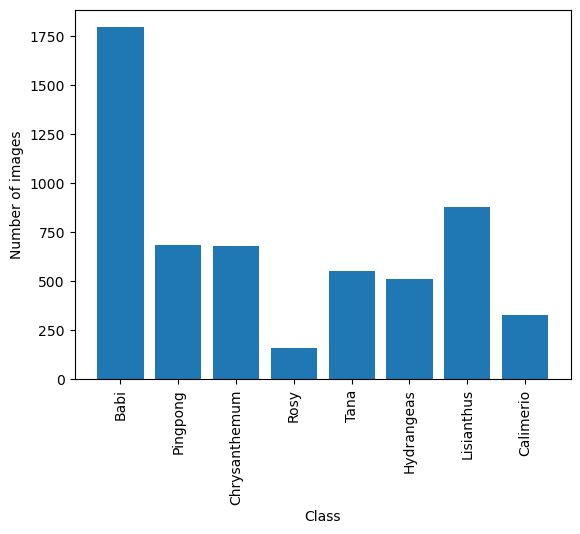

In [6]:
# Count the number of images in each class
class_counts = np.zeros(num_classes)
for label in labels:
    class_counts[label] += 1

# Visualize the class distribution
plt.bar(range(num_classes), class_counts)
plt.xticks(range(num_classes), classes, rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()

## Balance the data

In [7]:
# Upsample the minority classes to balance the class distribution
class_counts = np.bincount(labels)
max_class_size = class_counts.max()
for class_idx in range(num_classes):
    if class_counts[class_idx] < max_class_size:
        class_images = images[labels == class_idx]
        class_labels = labels[labels == class_idx]
        num_to_add = max_class_size - class_counts[class_idx]
        new_images, new_labels = resample(class_images, class_labels, n_samples=num_to_add, replace=True, random_state=42)
        images = np.concatenate([images, new_images], axis=0)
        labels = np.concatenate([labels, new_labels], axis=0)

# Shuffle the data again
images, labels = shuffle(images, labels, random_state=42)


## Image pixel distribution

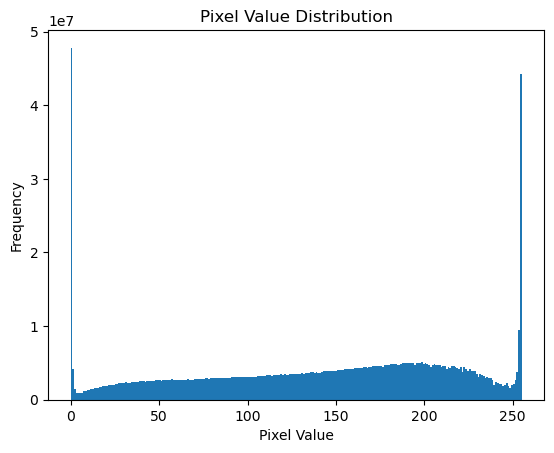

In [8]:
import matplotlib.pyplot as plt

# plot histogram of pixel values
plt.hist(images.ravel(), bins=256, range=(0, 255))
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Scaling data

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
images = scaler.fit_transform(images)

# Reshape the images back to their original dimensions
images = images.reshape(-1, new_image_size[0], new_image_size[1])

## Split data

In [10]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
X_train

array([[[ 0.9295723 ,  0.86407642,  0.86395388, ...,  1.00202946,
          1.01561912,  1.00998954],
        [ 0.87695114,  0.8211738 ,  0.82073544, ...,  0.99076082,
          1.00180677,  0.99861736],
        [ 0.83340918,  0.78933294,  0.80236056, ...,  0.98220611,
          0.99015796,  0.98758075],
        ...,
        [ 0.88556481,  0.82953151,  0.78056669, ...,  0.77496619,
          0.74873681,  0.74585452],
        [ 0.85980409,  0.81750117,  0.78066081, ...,  0.76070948,
          0.73641107,  0.73428778],
        [ 0.82362945,  0.8060823 ,  0.80500064, ...,  0.74987026,
          0.73923612,  0.7356386 ]],

       [[ 0.39053231,  0.1772987 , -0.0580708 , ...,  0.72162976,
          0.71243496,  0.69623907],
        [ 0.77558123,  0.53912858,  0.20083318, ...,  0.72098664,
          0.72062915,  0.70680365],
        [ 0.57379726,  0.71036229,  0.74599341, ...,  0.72342468,
          0.72019832,  0.70677987],
        ...,
        [ 1.18572993,  1.2458268 ,  1.30077883, ...,  

## Create CNN model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

# Define the input shape of the images
input_shape = (256, 256, 1)

# Define the number of classes
num_classes = len(classes)

# Define the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", ),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val),
)

Metal device set to: Apple M1 Pro
Epoch 1/10


2023-05-18 15:56:36.311292: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


360/360 [==============================] - 54s 148ms/step - loss: 0.8989 - accuracy: 0.6966 - val_loss: 1.9446 - val_accuracy: 0.2639
Epoch 2/10
360/360 [==============================] - 49s 135ms/step - loss: 0.1135 - accuracy: 0.9752 - val_loss: 0.2656 - val_accuracy: 0.9193
Epoch 3/10
360/360 [==============================] - 49s 135ms/step - loss: 0.0559 - accuracy: 0.9855 - val_loss: 0.1901 - val_accuracy: 0.9482
Epoch 4/10
360/360 [==============================] - 48s 134ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.2083 - val_accuracy: 0.9461
Epoch 5/10
360/360 [==============================] - 48s 132ms/step - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.2567 - val_accuracy: 0.9294
Epoch 6/10
360/360 [==============================] - 48s 132ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.1866 - val_accuracy: 0.9437
Epoch 7/10
360/360 [==============================] - 48s 133ms/step - loss: 0.0392 - accuracy: 0.9870 - val_loss: 0.1882 - val_accuracy: 0.9

## Classification report

### ***Test set***

In [13]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_val, y_pred_classes, target_names=classes))

90/90 [==============================] - 4s 42ms/step
               precision    recall  f1-score   support

         Babi       0.95      0.84      0.89       363
     Pingpong       0.96      0.98      0.97       334
Chrysanthemum       0.88      0.92      0.90       357
         Rosy       0.99      1.00      0.99       346
         Tana       0.96      0.91      0.93       361
   Hydrangeas       0.96      0.94      0.95       372
   Lisianthus       0.88      0.94      0.91       364
    Calimerio       0.96      0.99      0.97       379

     accuracy                           0.94      2876
    macro avg       0.94      0.94      0.94      2876
 weighted avg       0.94      0.94      0.94      2876



### ***Train set***

In [14]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_train, y_pred_classes, target_names=classes))


360/360 [==============================] - 15s 42ms/step
               precision    recall  f1-score   support

         Babi       1.00      1.00      1.00      1434
     Pingpong       1.00      1.00      1.00      1463
Chrysanthemum       0.95      0.98      0.97      1440
         Rosy       1.00      1.00      1.00      1451
         Tana       0.98      0.95      0.96      1436
   Hydrangeas       1.00      0.99      0.99      1425
   Lisianthus       0.99      0.99      0.99      1433
    Calimerio       0.99      1.00      0.99      1418

     accuracy                           0.99     11500
    macro avg       0.99      0.99      0.99     11500
 weighted avg       0.99      0.99      0.99     11500



## Visualise the result

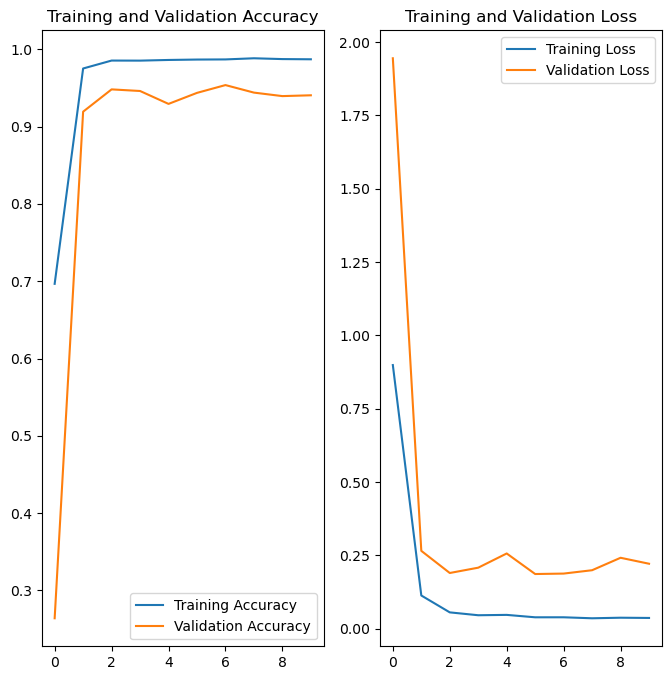

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Early Stopping

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape of the images
input_shape = (256, 256, 1)

# Define the number of classes
num_classes = len(classes)

# Define the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss doesn't improve
    patience=10,  # Wait for 10 epochs before stopping
    restore_best_weights=True  # Restore the weights from the best epoch
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=1000,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Use the early stopping callback
)


Epoch 1/1000
360/360 [==============================] - 53s 144ms/step - loss: 0.8752 - accuracy: 0.7077 - val_loss: 2.2339 - val_accuracy: 0.2357
Epoch 2/1000
360/360 [==============================] - 49s 135ms/step - loss: 0.1181 - accuracy: 0.9740 - val_loss: 0.2320 - val_accuracy: 0.9339
Epoch 3/1000
360/360 [==============================] - 48s 134ms/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.1863 - val_accuracy: 0.9419
Epoch 4/1000
360/360 [==============================] - 49s 137ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.2168 - val_accuracy: 0.9378
Epoch 5/1000
360/360 [==============================] - 51s 141ms/step - loss: 0.0418 - accuracy: 0.9856 - val_loss: 0.1868 - val_accuracy: 0.9447
Epoch 6/1000
360/360 [==============================] - 50s 139ms/step - loss: 0.0364 - accuracy: 0.9868 - val_loss: 0.2180 - val_accuracy: 0.9392
Epoch 7/1000
360/360 [==============================] - 51s 141ms/step - loss: 0.0370 - accuracy: 0.9868 - val_loss: 0

## Classification report

### ***Test set***

In [17]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_val, y_pred_classes, target_names=classes))

90/90 [==============================] - 4s 40ms/step
               precision    recall  f1-score   support

         Babi       0.93      0.91      0.92       363
     Pingpong       0.98      0.98      0.98       334
Chrysanthemum       0.96      0.89      0.92       357
         Rosy       1.00      1.00      1.00       346
         Tana       0.89      0.94      0.92       361
   Hydrangeas       0.94      0.96      0.95       372
   Lisianthus       0.90      0.94      0.92       364
    Calimerio       0.99      0.99      0.99       379

     accuracy                           0.95      2876
    macro avg       0.95      0.95      0.95      2876
 weighted avg       0.95      0.95      0.95      2876



### ***Train set***

In [18]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_train, y_pred_classes, target_names=classes))


360/360 [==============================] - 14s 40ms/step
               precision    recall  f1-score   support

         Babi       1.00      1.00      1.00      1434
     Pingpong       1.00      1.00      1.00      1463
Chrysanthemum       0.98      0.97      0.97      1440
         Rosy       1.00      1.00      1.00      1451
         Tana       0.97      0.98      0.97      1436
   Hydrangeas       0.99      1.00      1.00      1425
   Lisianthus       1.00      0.99      0.99      1433
    Calimerio       0.99      1.00      0.99      1418

     accuracy                           0.99     11500
    macro avg       0.99      0.99      0.99     11500
 weighted avg       0.99      0.99      0.99     11500



## Data Augmentation

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,256,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the input data to include the channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

# Define the input shape of the images
input_shape = (256, 256, 1)

# Define the number of classes
num_classes = len(classes)

# Define the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128),
        BatchNormalization(),
        layers.Activation("relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss doesn't improve
    patience=10,  # Wait for 10 epochs before stopping
    restore_best_weights=True  # Restore the weights from the best epoch
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images by 10 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by 10% of the height
    zoom_range=0.1,  # Randomly zoom images by 10%
    horizontal_flip=True  # Randomly flip images horizontally
)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=1000,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Use the early stopping callback
)


Epoch 1/1000
360/360 [==============================] - 54s 150ms/step - loss: 1.8632 - accuracy: 0.2983 - val_loss: 2.1653 - val_accuracy: 0.2017
Epoch 2/1000
360/360 [==============================] - 49s 134ms/step - loss: 1.5023 - accuracy: 0.4413 - val_loss: 2.2088 - val_accuracy: 0.3261
Epoch 3/1000
360/360 [==============================] - 49s 135ms/step - loss: 1.3093 - accuracy: 0.5150 - val_loss: 1.4735 - val_accuracy: 0.4833
Epoch 4/1000
360/360 [==============================] - 48s 134ms/step - loss: 1.1849 - accuracy: 0.5677 - val_loss: 1.2773 - val_accuracy: 0.5515
Epoch 5/1000
360/360 [==============================] - 48s 133ms/step - loss: 1.0827 - accuracy: 0.6092 - val_loss: 1.4477 - val_accuracy: 0.5045
Epoch 6/1000
360/360 [==============================] - 49s 135ms/step - loss: 0.9963 - accuracy: 0.6464 - val_loss: 1.0471 - val_accuracy: 0.6182
Epoch 7/1000
360/360 [==============================] - 48s 133ms/step - loss: 0.9489 - accuracy: 0.6642 - val_loss: 0

## Recommend 

In [20]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

def extract_features(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))  # Resize the image to a common size for feature extraction
    return np.array(img).ravel()

def content_based_recommendation(query_image_path, train_data_path):
    # Extract features from the query image
    query_features = extract_features(query_image_path)
    
    # Initialize a dictionary to store cosine similarity scores
    similarity_scores = {}
    
    # Iterate over the subfolders in the train data directory
    for folder_name in os.listdir(train_data_path):
        folder_path = os.path.join(train_data_path, folder_name)
        if not os.path.isdir(folder_path):
            continue
        
        # Iterate over the image files in each subfolder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            # Extract features from the train image
            train_features = extract_features(image_path)
            
            # Calculate the cosine similarity between query and train features
            similarity = cosine_similarity([query_features], [train_features])[0][0]
            
            # Store the similarity score for the current train image
            similarity_scores[image_path] = similarity
    
    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Display the top 10 recommended images
    for i in range(10):
        image_path, similarity = sorted_scores[i]
        print(f"Recommended Image {i+1}: {image_path} (Similarity Score: {similarity})")

# Example usage
query_image_path = "MyImage/Babi/Babi.jpeg"
train_data_path = "Flowers/"

content_based_recommendation(query_image_path, train_data_path)


Recommended Image 1: Flowers/Babi/babi_751.jpg (Similarity Score: 0.928652794130944)
Recommended Image 2: Flowers/Lisianthus/lisianthus_114.jpg (Similarity Score: 0.9277051166085342)
Recommended Image 3: Flowers/Babi/babi_617.jpg (Similarity Score: 0.9273501098399035)
Recommended Image 4: Flowers/Babi/babi_846.jpg (Similarity Score: 0.9269309863617841)
Recommended Image 5: Flowers/Babi/babi_569.jpg (Similarity Score: 0.9266741864495196)
Recommended Image 6: Flowers/Babi/babi_543.jpg (Similarity Score: 0.926228834829629)
Recommended Image 7: Flowers/Hydrangeas/hydrangeas_51.jpg (Similarity Score: 0.9257206491151836)
Recommended Image 8: Flowers/Pingpong/pingpong_96.jpg (Similarity Score: 0.9255890011134337)
Recommended Image 9: Flowers/Hydrangeas/hydrangeas_133.jpg (Similarity Score: 0.9254576591209835)
Recommended Image 10: Flowers/Hydrangeas/hydrangeas_46.jpg (Similarity Score: 0.925435194665233)
